In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os

print("--- Setup ---")
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)
print("---------------------\n")

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams.update({'font.size': 10}) 
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['image.cmap'] = 'gray'

--- Setup ---
OpenCV version: 4.12.0
NumPy version: 2.2.6
---------------------



# random RGB pattern

In [ ]:
width = 928
height = 928

In [ ]:
def generate_rgb_patches(image_size=512, patch_size=16, seed=None):
    """
    Generate a 512x512 (or custom size) image filled with R/G/B color patches.

    Args:
        image_size (int): Size of the square image (default 512)
        patch_size (int): Size of each square patch (e.g., 16, 32, 64)
        seed (int): Random seed for reproducibility

    Returns:
        np.ndarray: RGB image (uint8)
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    num_patches_per_row = image_size // patch_size
    num_total_patches = num_patches_per_row**2

    # Randomly assign each patch as R, G, or B (uniform distribution)
    colors = np.random.choice(["R", "G", "B"], num_total_patches)
    print(
        f"Color distribution: R={np.sum(colors=='R')}, G={np.sum(colors=='G')}, B={np.sum(colors=='B')}"
    )

    # Create empty RGB image
    img = np.zeros((image_size, image_size, 3), dtype=np.uint8)

    # Fill patches
    for i in range(num_patches_per_row):
        for j in range(num_patches_per_row):
            idx = i * num_patches_per_row + j
            color = colors[idx]
            if color == "R":
                patch_color = (255, 0, 0)
            elif color == "G":
                patch_color = (0, 255, 0)
            else:
                patch_color = (0, 0, 255)

            y0, y1 = i * patch_size, (i + 1) * patch_size
            x0, x1 = j * patch_size, (j + 1) * patch_size
            img[y0:y1, x0:x1] = patch_color

    return img

Color distribution: R=1088, G=1150, B=1126


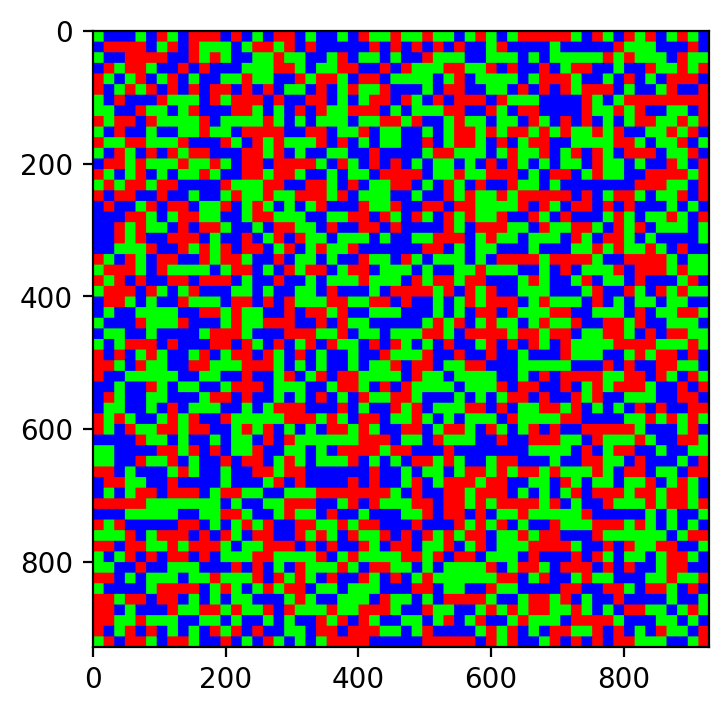

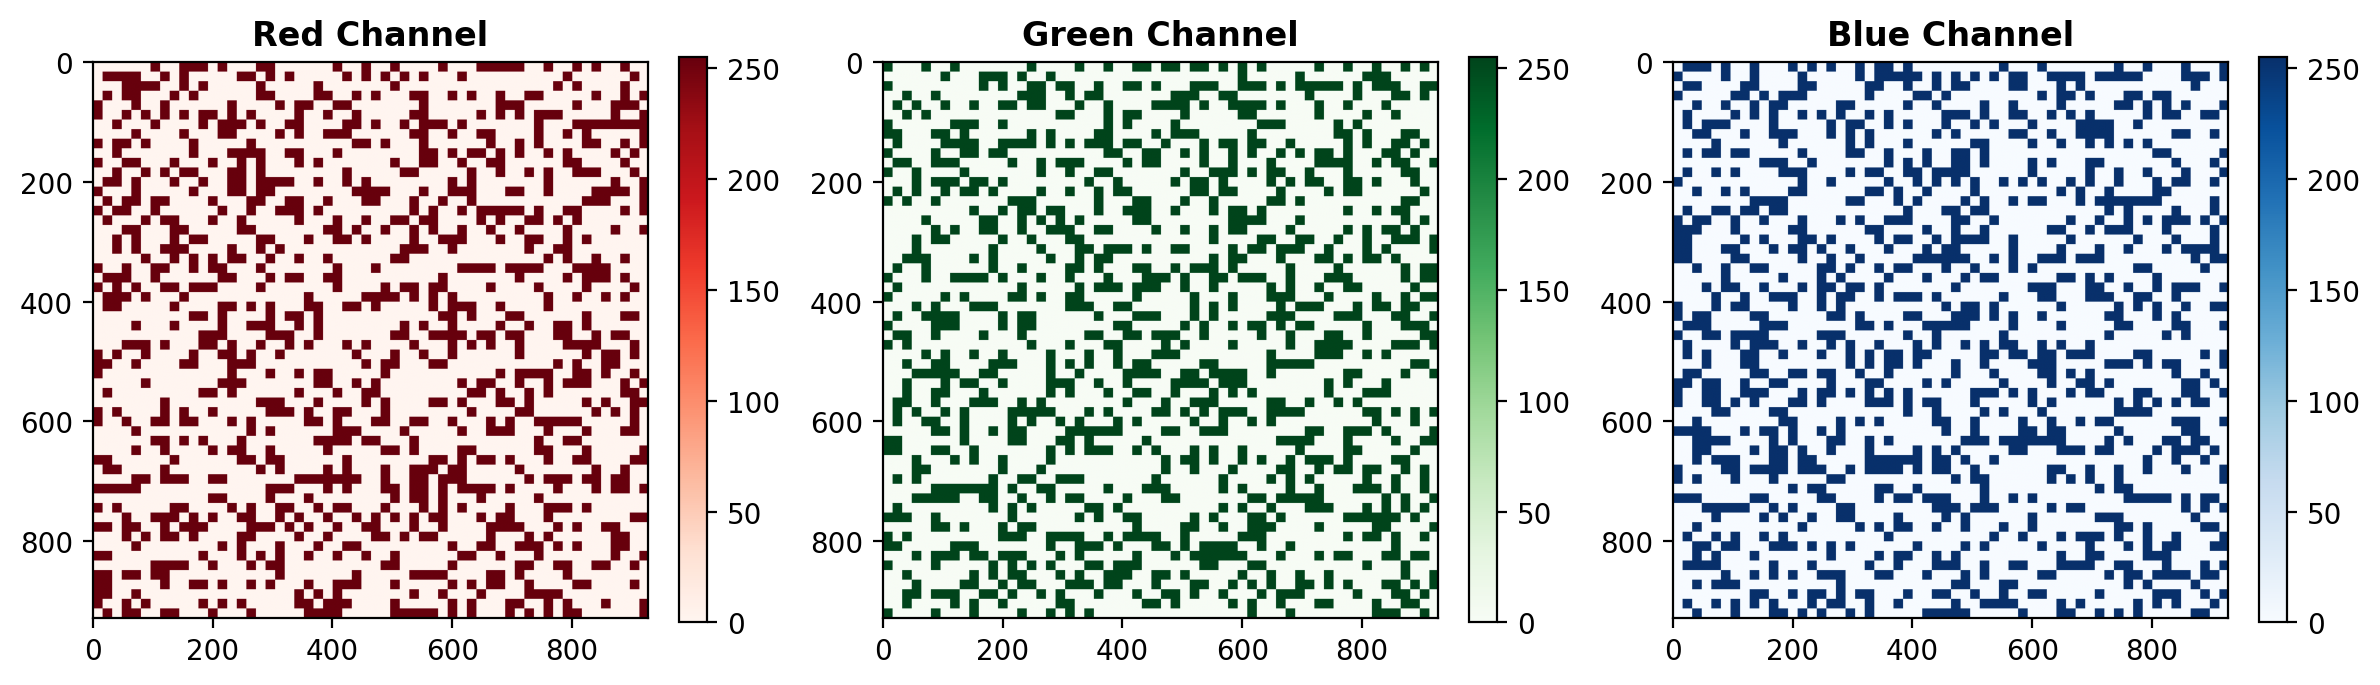

In [ ]:
patch_size = 16
image_size = 928
random_seed = 202511
img = generate_rgb_patches(image_size, patch_size, random_seed)
plt.imshow(img)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
colors = ["Reds", "Greens", "Blues"]
labels = ["Red Channel", "Green Channel", "Blue Channel"]

for i, ax in enumerate(axes):
    im = ax.imshow(img[..., i], cmap=colors[i], vmin=0, vmax=255)
    ax.set_title(labels[i])
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()

cv2.imwrite(f"rgb_patches_{patch_size}px.png", img)

True